In [63]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

In [103]:
life_expectancy_df = pd.read_csv('/Users/jaydasondi/Desktop/MLPro/SLR/Life Expectancy/Dataset/Life Expectancy Data.csv')

In [65]:
life_expectancy_df

Country  Year      Status  Life expectancy   Adult Mortality  \
0     Afghanistan  2015  Developing              65.0            263.0   
1     Afghanistan  2014  Developing              59.9            271.0   
2     Afghanistan  2013  Developing              59.9            268.0   
3     Afghanistan  2012  Developing              59.5            272.0   
4     Afghanistan  2011  Developing              59.2            275.0   
...           ...   ...         ...               ...              ...   
2933     Zimbabwe  2004  Developing              44.3            723.0   
2934     Zimbabwe  2003  Developing              44.5            715.0   
2935     Zimbabwe  2002  Developing              44.8             73.0   
2936     Zimbabwe  2001  Developing              45.3            686.0   
2937     Zimbabwe  2000  Developing              46.0            665.0   

      infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   \
0                62     0.01               71.279624         65.0      1154   
1                64     0.01               73.523582         62.0       492   
2                66     0.01               73.219243         64.0       430   
3                69     0.01               78.184215         67.0      2787   
4                71     0.01                7.097109         68.0      3013   
...             ...      ...                     ...          ...       ...   
2933             27     4.36                0.000000         68.0        31   
2934             26     4.06                0.000000          7.0       998   
2935             25     4.43                0.000000         73.0       304   
2936             25     1.72                0.000000         76.0       529   
2937             24     1.68                0.000000         79.0      1483   

      ...  Polio  Total expenditure  Diphtheria    HIV/AIDS         GDP  \
0     ...    6.0               8.16         65.0        0.1  584.259210   
1     ...   58.0               8.18         62.0        0.1  612.696514   
2     ...   62.0               8.13         64.0        0.1  631.744976   
3     ...   67.0               8.52         67.0        0.1  669.959000   
4     ...   68.0               7.87         68.0        0.1   63.537231   
...   ...    ...                ...          ...        ...         ...   
2933  ...   67.0               7.13         65.0       33.6  454.366654   
2934  ...    7.0               6.52         68.0       36.7  453.351155   
2935  ...   73.0               6.53         71.0       39.8   57.348340   
2936  ...   76.0               6.16         75.0       42.1  548.587312   
2937  ...   78.0               7.10         78.0       43.5  547.358878   

      Population   thinness  1-19 years   thinness 5-9 years  \
0     33736494.0                   17.2                 17.3   
1       327582.0                   17.5                 17.5   
2     31731688.0                   17.7                 17.7   
3      3696958.0                   17.9                 18.0   
4      2978599.0                   18.2                 18.2   
...          ...                    ...                  ...   
2933  12777511.0                    9.4                  9.4   
2934  12633897.0                    9.8                  9.9   
2935    125525.0                    1.2                  1.3   
2936  12366165.0                    1.6                  1.7   
2937  12222251.0                   11.0                 11.2   

      Income composition of resources  Schooling  
0                               0.479       10.1  
1                               0.476       10.0  
2                               0.470        9.9  
3                               0.463        9.8  
4                               0.454        9.5  
...                               ...        ...  
2933                            0.407        9.2  
2934                            0.418        9.5  
2935                            0.427      

Performing Exploratory Data Analysis

<Axes: >

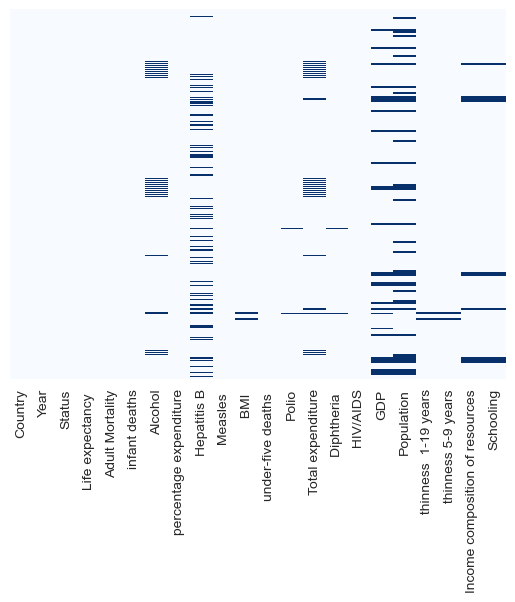

In [66]:
sns.heatmap(life_expectancy_df.isnull(), yticklabels=False,cbar=False,cmap='Blues')

Plot the Histogram

In [67]:
life_expectancy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [68]:
life_expectancy_df.describe()

Year  Life expectancy   Adult Mortality  infant deaths  \
count  2938.000000       2928.000000      2928.000000    2938.000000   
mean   2007.518720         69.224932       164.796448      30.303948   
std       4.613841          9.523867       124.292079     117.926501   
min    2000.000000         36.300000         1.000000       0.000000   
25%    2004.000000         63.100000        74.000000       0.000000   
50%    2008.000000         72.100000       144.000000       3.000000   
75%    2012.000000         75.700000       228.000000      22.000000   
max    2015.000000         89.000000       723.000000    1800.000000   

           Alcohol  percentage expenditure  Hepatitis B       Measles   \
count  2744.000000             2938.000000  2385.000000    2938.000000   
mean      4.602861              738.251295    80.940461    2419.592240   
std       4.052413             1987.914858    25.070016   11467.272489   
min       0.010000                0.000000     1.000000       0.000000   
25%       0.877500                4.685343    77.000000       0.000000   
50%       3.755000               64.912906    92.000000      17.000000   
75%       7.702500              441.534144    97.000000     360.250000   
max      17.870000            19479.911610    99.000000  212183.000000   

              BMI   under-five deaths         Polio  Total expenditure  \
count  2904.000000         2938.000000  2919.000000         2712.00000   
mean     38.321247           42.035739    82.550188            5.93819   
std      20.044034          160.445548    23.428046            2.49832   
min       1.000000            0.000000     3.000000            0.37000   
25%      19.300000            0.000000    78.000000            4.26000   
50%      43.500000            4.000000    93.000000            5.75500   
75%      56.200000           28.000000    97.000000            7.49250   
max      87.300000         2500.000000    99.000000           17.60000   

       Diphtheria      HIV/AIDS            GDP    Population  \
count  2919.000000  2938.000000    2490.000000  2.286000e+03   
mean     82.324084     1.742103    7483.158469  1.275338e+07   
std      23.716912     5.077785   14270.169342  6.101210e+07   
min       2.000000     0.100000       1.681350  3.400000e+01   
25%      78.000000     0.100000     463.935626  1.957932e+05   
50%      93.000000     0.100000    1766.947595  1.386542e+06   
75%      97.000000     0.800000    5910.806335  7.420359e+06   
max      99.000000    50.600000  119172.741800  1.293859e+09   

        thinness  1-19 years   thinness 5-9 years  \
count            2904.000000          2904.000000   
mean                4.839704             4.870317   
std                 4.420195             4.508882   
min                 0.100000             0.100000   
25%                 1.600000             1.500000   
50%                 3.300000             3.300000   
75%                 7.200000             7.200000   
max                27.700000            28.600000   

       Income composition of resources    Schooling  
count                      2771.000000  2775.000000  
mean                          0.627551    11.992793  
std                           0.210904     3.358920  
min                           0.000000     0.000000  
25%                           0.493000    10.100000  
50%                           0.677000    12.300000  
75%                           0.779000    14.300000  
max                           0.948000    20.700000

array([[<Axes: title={'center': 'Year'}>,
        <Axes: title={'center': 'Life expectancy '}>,
        <Axes: title={'center': 'Adult Mortality'}>,
        <Axes: title={'center': 'infant deaths'}>],
       [<Axes: title={'center': 'Alcohol'}>,
        <Axes: title={'center': 'percentage expenditure'}>,
        <Axes: title={'center': 'Hepatitis B'}>,
        <Axes: title={'center': 'Measles '}>],
       [<Axes: title={'center': ' BMI '}>,
        <Axes: title={'center': 'under-five deaths '}>,
        <Axes: title={'center': 'Polio'}>,
        <Axes: title={'center': 'Total expenditure'}>],
       [<Axes: title={'center': 'Diphtheria '}>,
        <Axes: title={'center': ' HIV/AIDS'}>,
        <Axes: title={'center': 'GDP'}>,
        <Axes: title={'center': 'Population'}>],
       [<Axes: title={'center': ' thinness  1-19 years'}>,
        <Axes: title={'center': ' thinness 5-9 years'}>,
        <Axes: title={'center': 'Income composition of resources'}>,
        <Axes: title={'center

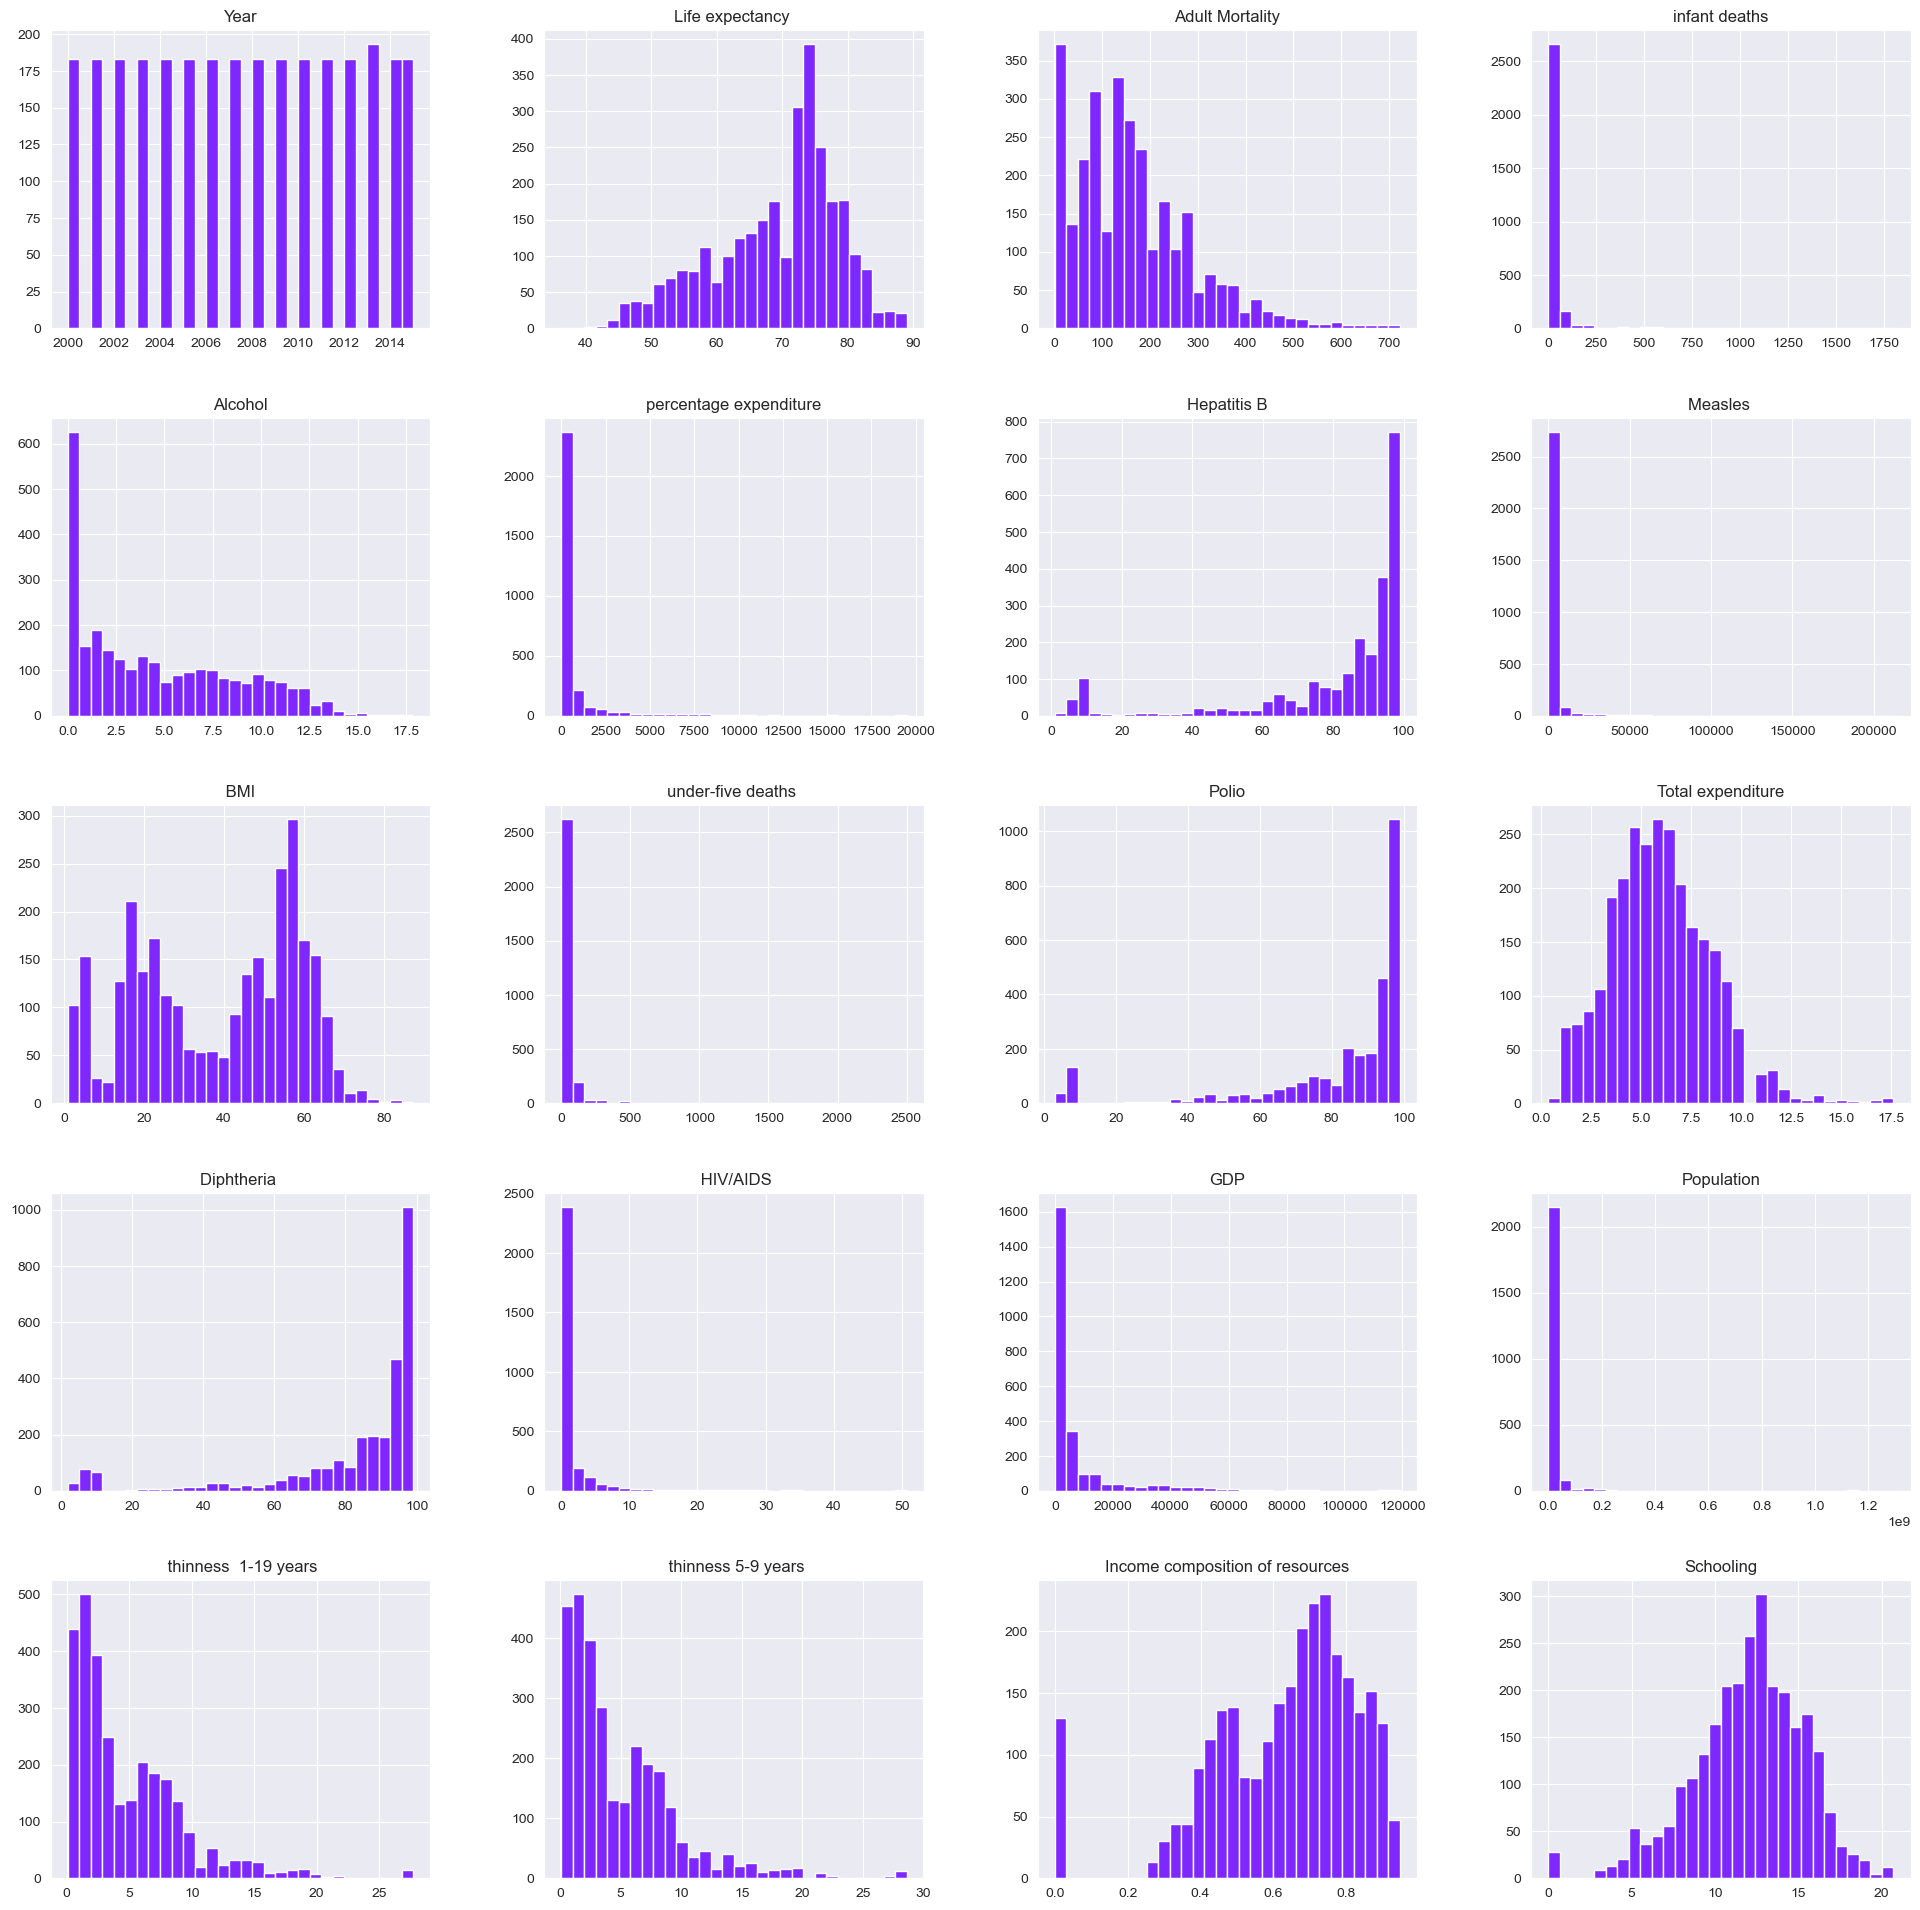

In [69]:
life_expectancy_df.hist(bins=30, figsize=(24, 24), color='#7F27FF')

Plot pairplot

/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 2400x2400 with 0 Axes>

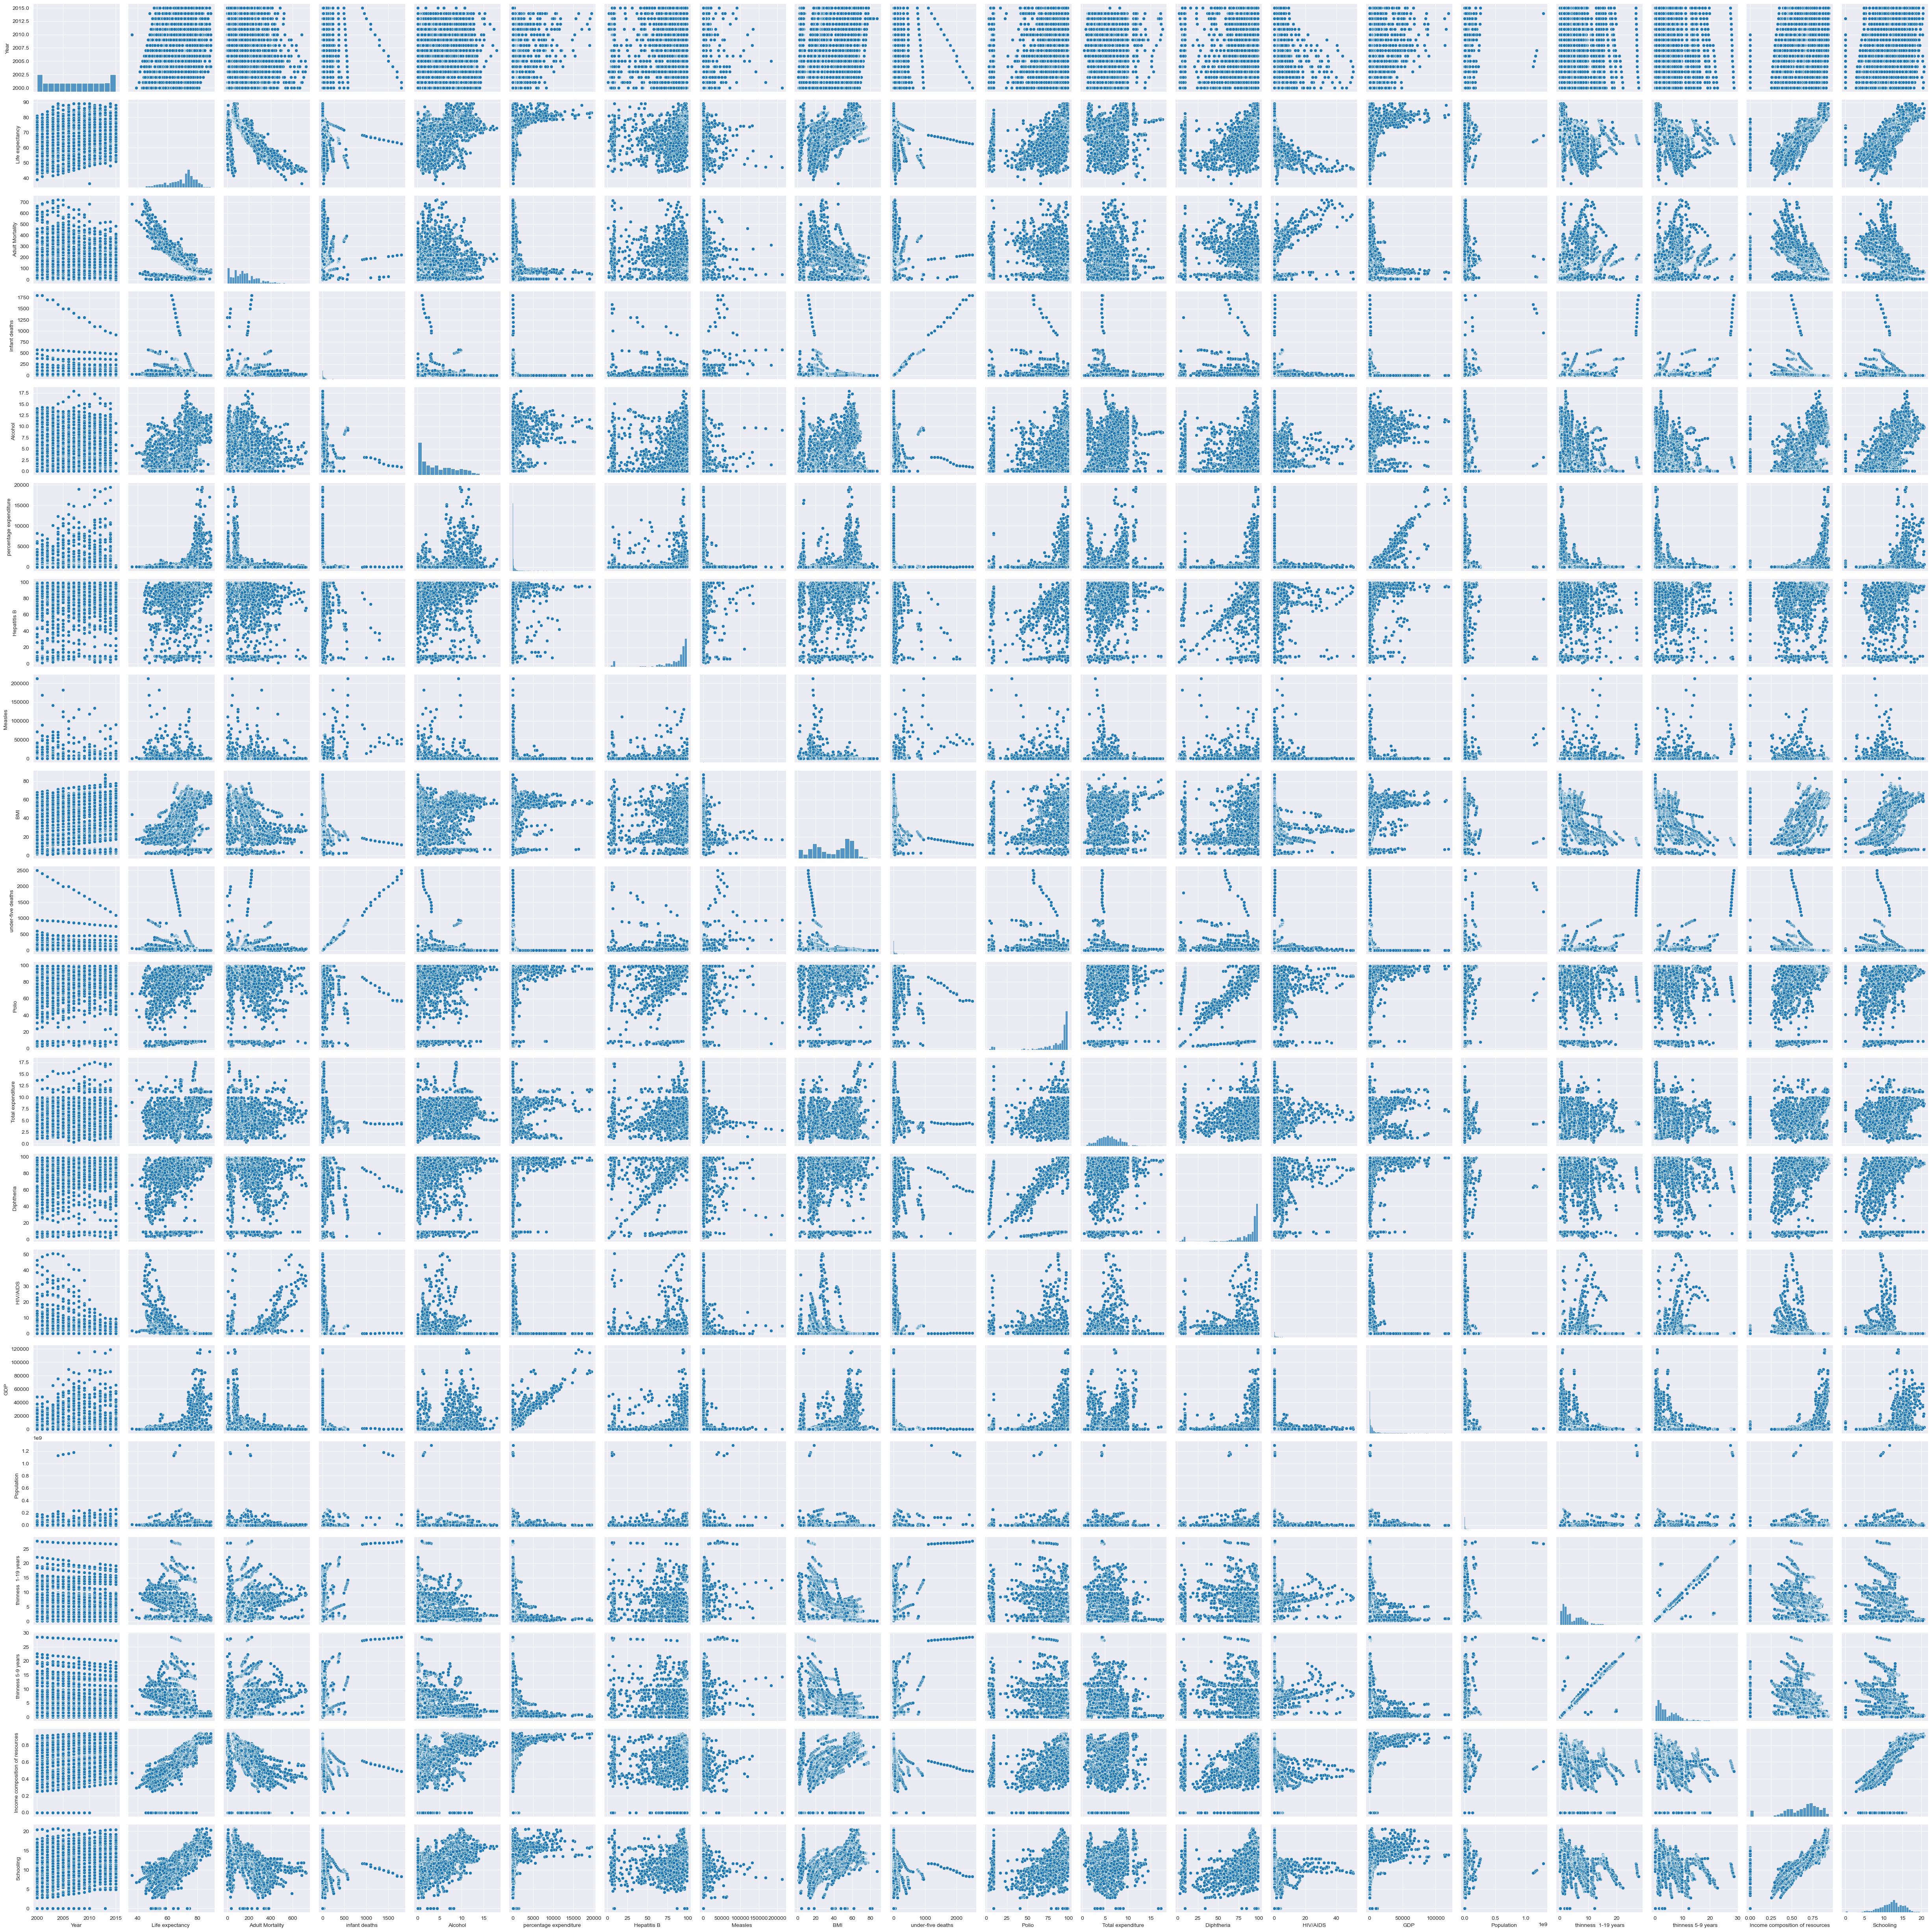

In [70]:
plt.figure(figsize=(24, 24))
sns.pairplot(life_expectancy_df)

<Axes: xlabel='Schooling', ylabel='Life expectancy '>

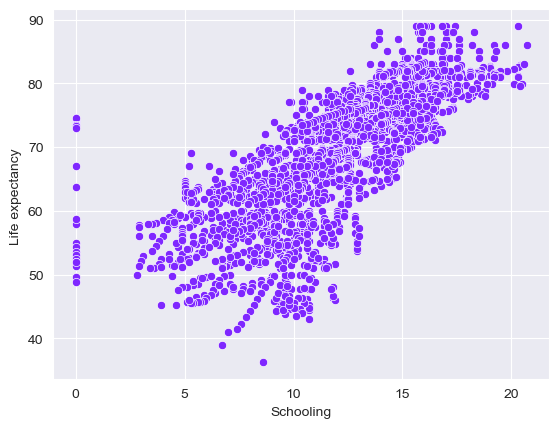

In [71]:
sns.scatterplot(data = life_expectancy_df, x = 'Schooling', y = 'Life expectancy ', color= '#7F27FF')

<Axes: xlabel='GDP', ylabel='Life expectancy '>

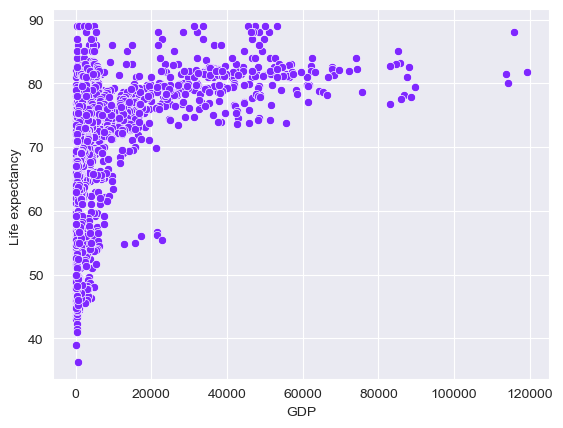

In [72]:
sns.scatterplot(data=life_expectancy_df, x = 'GDP', y = 'Life expectancy ', color='#7F27FF')

How productive resources are used.

<Axes: xlabel='Income composition of resources', ylabel='Life expectancy '>

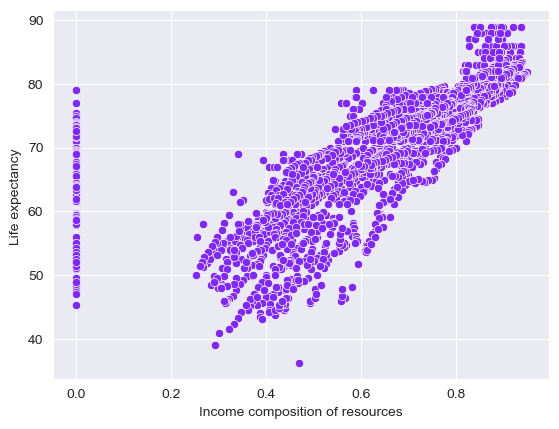

In [73]:
sns.scatterplot(data=life_expectancy_df, x = 'Income composition of resources', y='Life expectancy ', color = '#7F27FF')

<Axes: xlabel=' HIV/AIDS', ylabel='Life expectancy '>

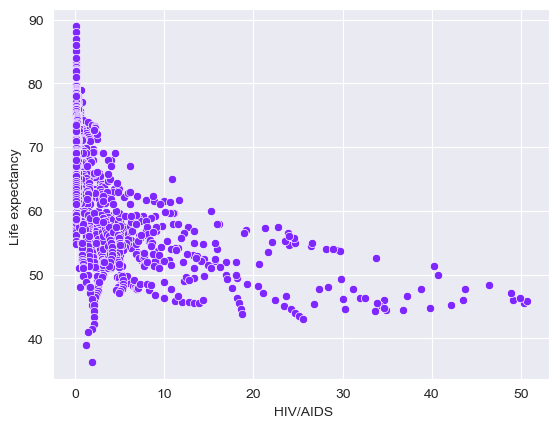

In [74]:
sns.scatterplot(data=life_expectancy_df, x = ' HIV/AIDS', y='Life expectancy ', color = '#7F27FF')

HIV/AIDS death increases, life expectancy is reduced.

Plot the Correlation matrix

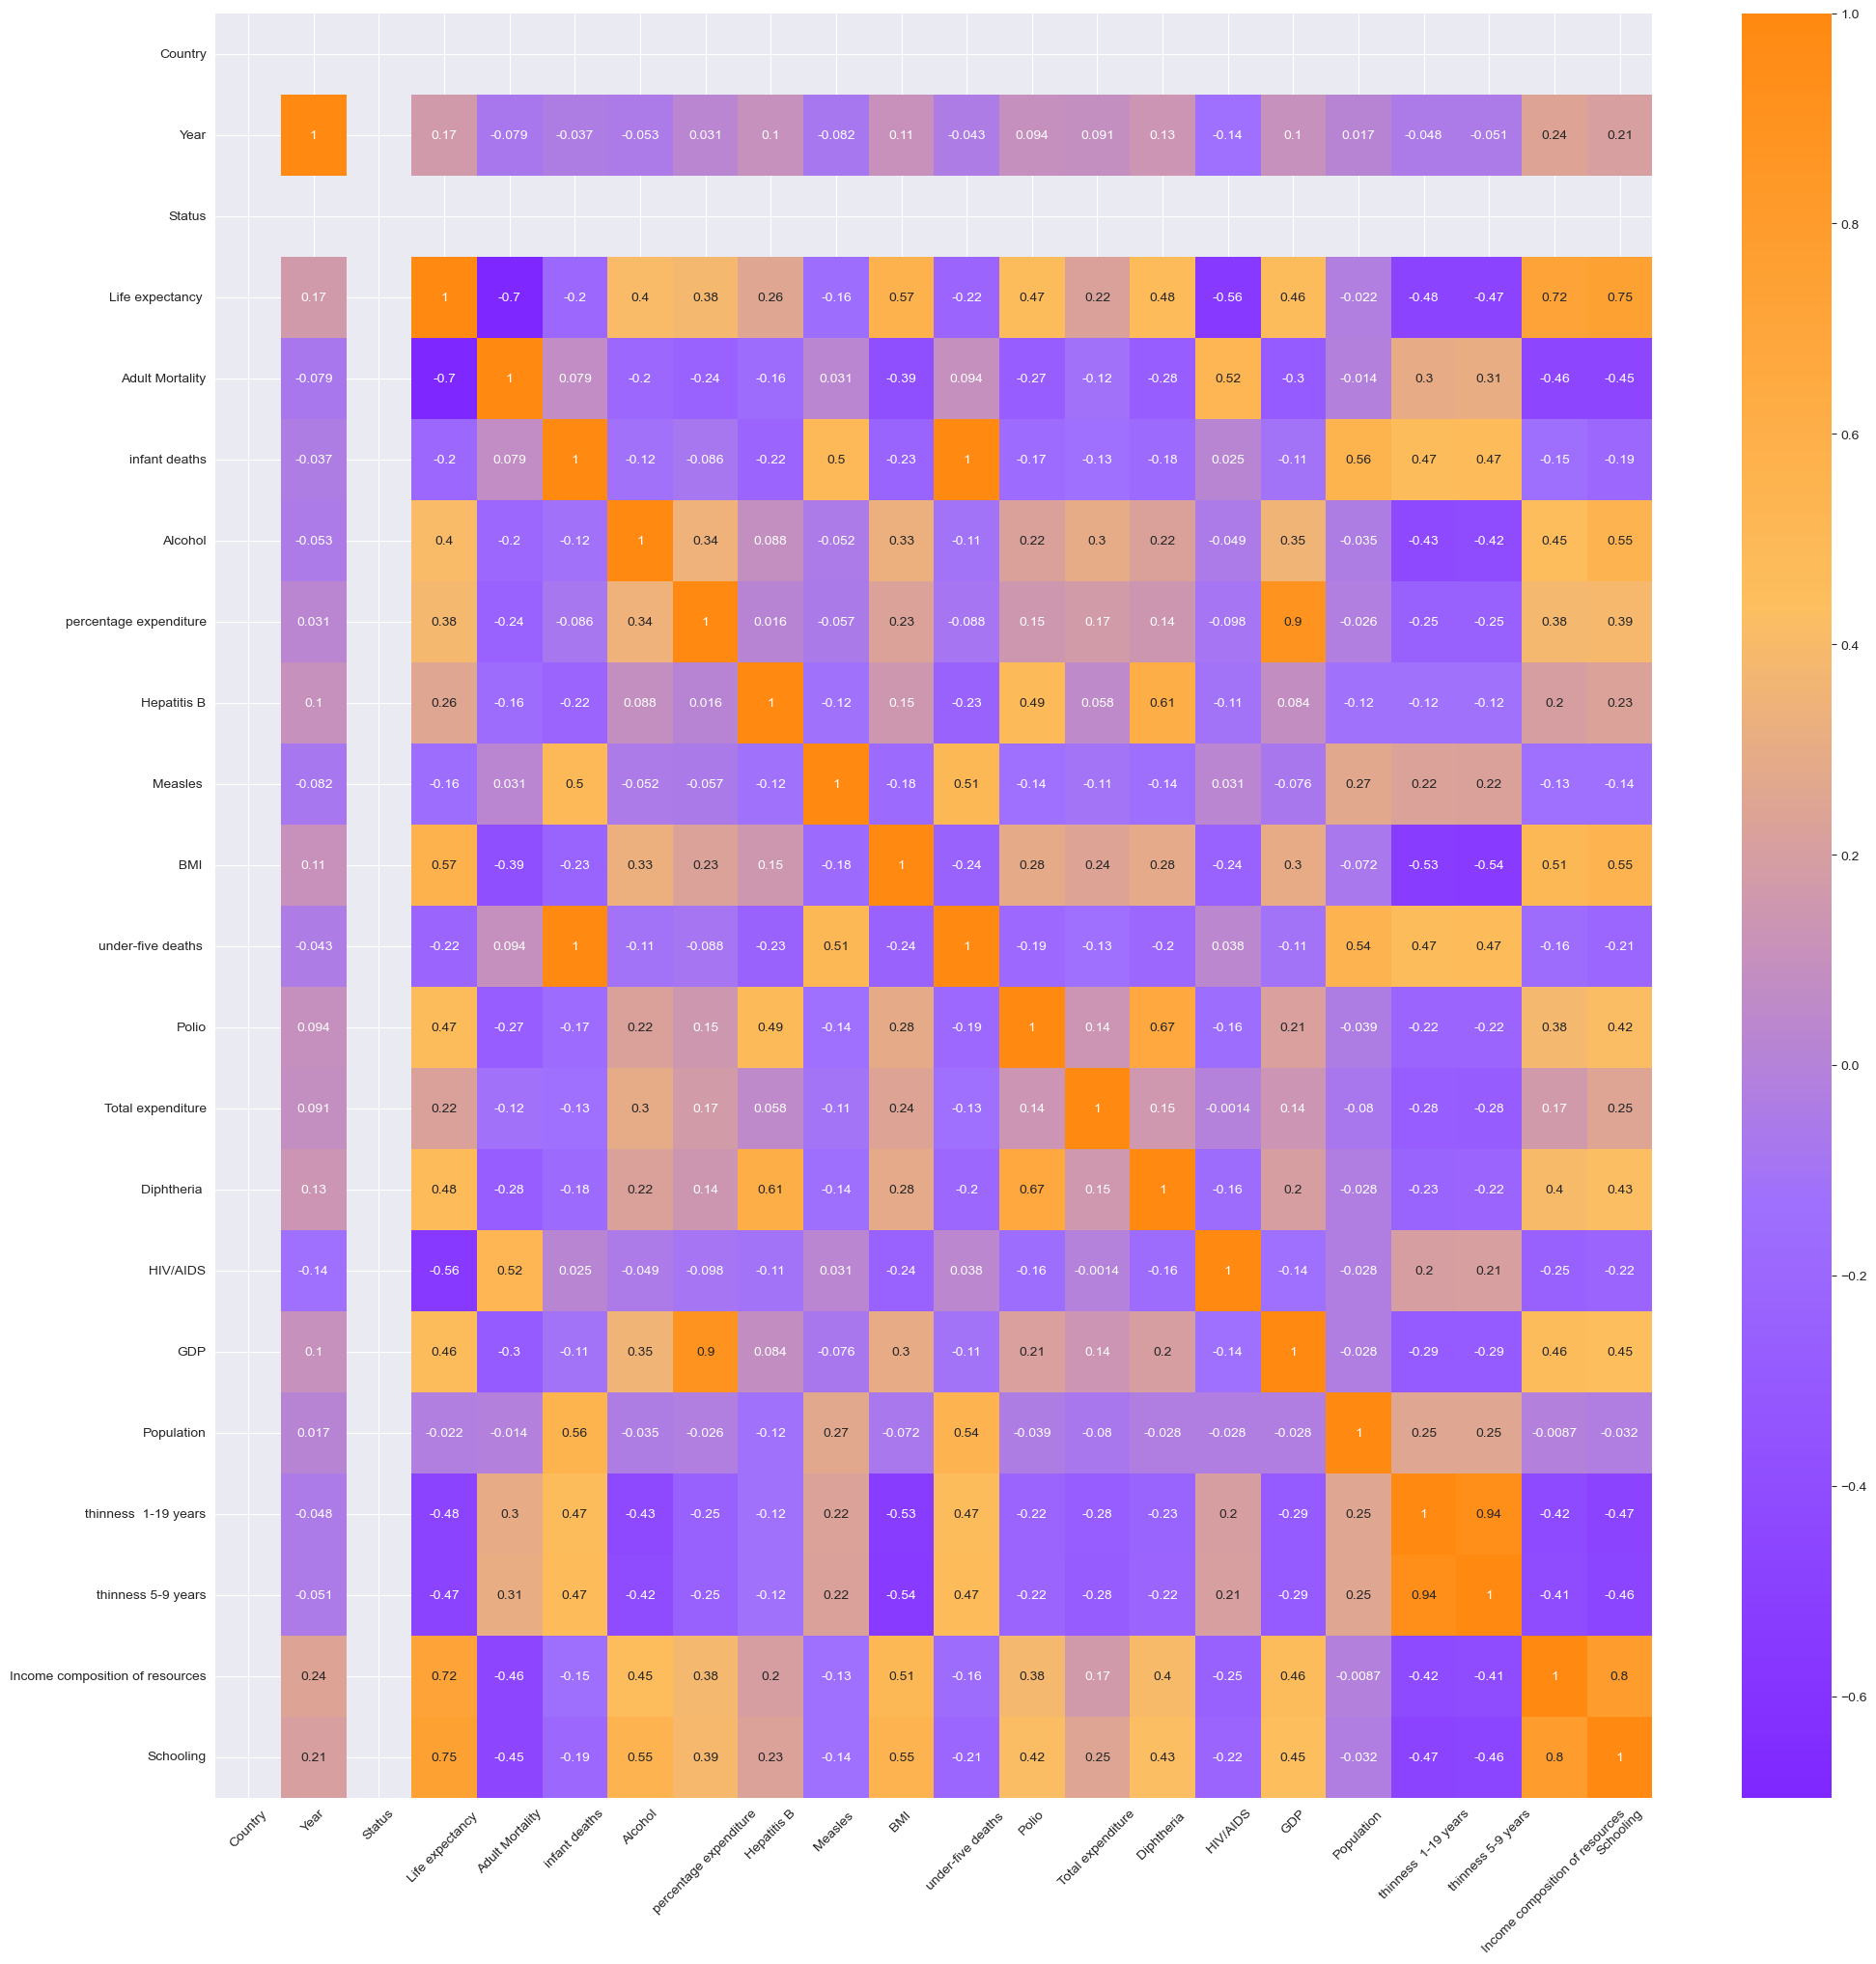

In [75]:
# Convert non-numeric columns to numeric before calculating correlation
for col in life_expectancy_df.columns:
    if not pd.api.types.is_numeric_dtype(life_expectancy_df[col]):
        life_expectancy_df[col] = pd.to_numeric(life_expectancy_df[col], errors='coerce')  # Replace non-numeric values with NaN

# Calculate correlation matrix
corr_matrix = life_expectancy_df.corr()
colors = ["#7F27FF", "#9F70FD", "#FDBF60", "#FF8911"]
cmap = mcolors.LinearSegmentedColormap.from_list("", colors)

# Create a heatmap
plt.figure(figsize=(24, 24)) 
sns.heatmap(corr_matrix, annot=True, cmap=cmap)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()

In [76]:
# Perform one-hot encoding
life_expectancy_df = pd.get_dummies(life_expectancy_df, columns = ['Status'])

In [77]:
life_expectancy_df

Country  Year  Life expectancy   Adult Mortality  infant deaths  \
0         NaN  2015              65.0            263.0             62   
1         NaN  2014              59.9            271.0             64   
2         NaN  2013              59.9            268.0             66   
3         NaN  2012              59.5            272.0             69   
4         NaN  2011              59.2            275.0             71   
...       ...   ...               ...              ...            ...   
2933      NaN  2004              44.3            723.0             27   
2934      NaN  2003              44.5            715.0             26   
2935      NaN  2002              44.8             73.0             25   
2936      NaN  2001              45.3            686.0             25   
2937      NaN  2000              46.0            665.0             24   

      Alcohol  percentage expenditure  Hepatitis B  Measles    BMI   ...  \
0        0.01               71.279624         65.0      1154   19.1  ...   
1        0.01               73.523582         62.0       492   18.6  ...   
2        0.01               73.219243         64.0       430   18.1  ...   
3        0.01               78.184215         67.0      2787   17.6  ...   
4        0.01                7.097109         68.0      3013   17.2  ...   
...       ...                     ...          ...       ...    ...  ...   
2933     4.36                0.000000         68.0        31   27.1  ...   
2934     4.06                0.000000          7.0       998   26.7  ...   
2935     4.43                0.000000         73.0       304   26.3  ...   
2936     1.72                0.000000         76.0       529   25.9  ...   
2937     1.68                0.000000         79.0      1483   25.5  ...   

      Polio  Total expenditure  Diphtheria    HIV/AIDS         GDP  \
0       6.0               8.16         65.0        0.1  584.259210   
1      58.0               8.18         62.0        0.1  612.696514   
2      62.0               8.13         64.0        0.1  631.744976   
3      67.0               8.52         67.0        0.1  669.959000   
4      68.0               7.87         68.0        0.1   63.537231   
...     ...                ...          ...        ...         ...   
2933   67.0               7.13         65.0       33.6  454.366654   
2934    7.0               6.52         68.0       36.7  453.351155   
2935   73.0               6.53         71.0       39.8   57.348340   
2936   76.0               6.16         75.0       42.1  548.587312   
2937   78.0               7.10         78.0       43.5  547.358878   

      Population   thinness  1-19 years   thinness 5-9 years  \
0     33736494.0                   17.2                 17.3   
1       327582.0                   17.5                 17.5   
2     31731688.0                   17.7                 17.7   
3      3696958.0                   17.9                 18.0   
4      2978599.0                   18.2                 18.2   
...          ...                    ...                  ...   
2933  12777511.0                    9.4                  9.4   
2934  12633897.0                    9.8                  9.9   
2935    125525.0                    1.2                  1.3   
2936  12366165.0                    1.6                  1.7   
2937  12222251.0                   11.0                 11.2   

      Income composition of resources  Schooling  
0                               0.479       10.1  
1                               0.476       10.0  
2                               0.470        9.9  
3                               0.463        9.8  
4                               0.454        9.5  
...                               ...        ...  
2933                            0.407        9.2  
2934                            0.418        9.5  
2935                            0.427       10.0  
2936                            0.427        9.8  
2937                            0.434        

In [78]:
# Check the number of null values for the columns having null values
life_expectancy_df.isnull().sum()[np.where(life_expectancy_df.isnull().sum() != 0)[0]]

Country                            2938
Life expectancy                      10
Adult Mortality                      10
Alcohol                             194
Hepatitis B                         553
 BMI                                 34
Polio                                19
Total expenditure                   226
Diphtheria                           19
GDP                                 448
Population                          652
 thinness  1-19 years                34
 thinness 5-9 years                  34
Income composition of resources     167
Schooling                           163
dtype: int64

In [79]:
# Since most of the are continous values we fill them with mean
life_expectancy_df = life_expectancy_df.apply(lambda x: x.fillna(x.mean()),axis=0)

In [80]:
life_expectancy_df.isnull().sum()[np.where(life_expectancy_df.isnull().sum() != 0)[0]]

Country    2938
dtype: int64

Create train and test data

In [81]:
X = life_expectancy_df.drop(columns = ['Life expectancy '])
y = life_expectancy_df[['Life expectancy ']]

In [82]:
X

Country  Year  Adult Mortality  infant deaths  Alcohol  \
0         NaN  2015            263.0             62     0.01   
1         NaN  2014            271.0             64     0.01   
2         NaN  2013            268.0             66     0.01   
3         NaN  2012            272.0             69     0.01   
4         NaN  2011            275.0             71     0.01   
...       ...   ...              ...            ...      ...   
2933      NaN  2004            723.0             27     4.36   
2934      NaN  2003            715.0             26     4.06   
2935      NaN  2002             73.0             25     4.43   
2936      NaN  2001            686.0             25     1.72   
2937      NaN  2000            665.0             24     1.68   

      percentage expenditure  Hepatitis B  Measles    BMI   \
0                  71.279624         65.0      1154   19.1   
1                  73.523582         62.0       492   18.6   
2                  73.219243         64.0       430   18.1   
3                  78.184215         67.0      2787   17.6   
4                   7.097109         68.0      3013   17.2   
...                      ...          ...       ...    ...   
2933                0.000000         68.0        31   27.1   
2934                0.000000          7.0       998   26.7   
2935                0.000000         73.0       304   26.3   
2936                0.000000         76.0       529   25.9   
2937                0.000000         79.0      1483   25.5   

      under-five deaths   Polio  Total expenditure  Diphtheria    HIV/AIDS  \
0                     83    6.0               8.16         65.0        0.1   
1                     86   58.0               8.18         62.0        0.1   
2                     89   62.0               8.13         64.0        0.1   
3                     93   67.0               8.52         67.0        0.1   
4                     97   68.0               7.87         68.0        0.1   
...                  ...    ...                ...          ...        ...   
2933                  42   67.0               7.13         65.0       33.6   
2934                  41    7.0               6.52         68.0       36.7   
2935                  40   73.0               6.53         71.0       39.8   
2936                  39   76.0               6.16         75.0       42.1   
2937                  39   78.0               7.10         78.0       43.5   

             GDP  Population   thinness  1-19 years   thinness 5-9 years  \
0     584.259210  33736494.0                   17.2                 17.3   
1     612.696514    327582.0                   17.5                 17.5   
2     631.744976  31731688.0                   17.7                 17.7   
3     669.959000   3696958.0                   17.9                 18.0   
4      63.537231   2978599.0                   18.2                 18.2   
...          ...         ...                    ...                  ...   
2933  454.366654  12777511.0                    9.4                  9.4   
2934  453.351155  12633897.0                    9.8                  9.9   
2935   57.348340    125525.0                    1.2                  1.3   
2936  548.587312  12366165.0                    1.6                  1.7   
2937  547.358878  12222251.0                   11.0                 11.2   

      Income composition of resources  Schooling  
0                               0.479       10.1  
1                               0.476       10.0  
2                               0.470        9.9  
3                               0.463        9.8  
4                               0.454        9.5  
...                               ...        ...  
2933                            0.407        9.2  
2934                            0.418        9.5  
2935                            0.427       10.0  
2936                            0.427        9.8  
2937                            0.434        9.8  

[2938 rows x 20 columns]

In [83]:
y

Life expectancy 
0                 65.0
1                 59.9
2                 59.9
3                 59.5
4                 59.2
...                ...
2933              44.3
2934              44.5
2935              44.8
2936              45.3
2937              46.0

[2938 rows x 1 columns]

In [84]:
X.shape

(2938, 20)

In [85]:
y.shape

(2938, 1)

Convert the data type to float32

In [86]:
X

Country  Year  Adult Mortality  infant deaths  Alcohol  \
0         NaN  2015            263.0             62     0.01   
1         NaN  2014            271.0             64     0.01   
2         NaN  2013            268.0             66     0.01   
3         NaN  2012            272.0             69     0.01   
4         NaN  2011            275.0             71     0.01   
...       ...   ...              ...            ...      ...   
2933      NaN  2004            723.0             27     4.36   
2934      NaN  2003            715.0             26     4.06   
2935      NaN  2002             73.0             25     4.43   
2936      NaN  2001            686.0             25     1.72   
2937      NaN  2000            665.0             24     1.68   

      percentage expenditure  Hepatitis B  Measles    BMI   \
0                  71.279624         65.0      1154   19.1   
1                  73.523582         62.0       492   18.6   
2                  73.219243         64.0       430   18.1   
3                  78.184215         67.0      2787   17.6   
4                   7.097109         68.0      3013   17.2   
...                      ...          ...       ...    ...   
2933                0.000000         68.0        31   27.1   
2934                0.000000          7.0       998   26.7   
2935                0.000000         73.0       304   26.3   
2936                0.000000         76.0       529   25.9   
2937                0.000000         79.0      1483   25.5   

      under-five deaths   Polio  Total expenditure  Diphtheria    HIV/AIDS  \
0                     83    6.0               8.16         65.0        0.1   
1                     86   58.0               8.18         62.0        0.1   
2                     89   62.0               8.13         64.0        0.1   
3                     93   67.0               8.52         67.0        0.1   
4                     97   68.0               7.87         68.0        0.1   
...                  ...    ...                ...          ...        ...   
2933                  42   67.0               7.13         65.0       33.6   
2934                  41    7.0               6.52         68.0       36.7   
2935                  40   73.0               6.53         71.0       39.8   
2936                  39   76.0               6.16         75.0       42.1   
2937                  39   78.0               7.10         78.0       43.5   

             GDP  Population   thinness  1-19 years   thinness 5-9 years  \
0     584.259210  33736494.0                   17.2                 17.3   
1     612.696514    327582.0                   17.5                 17.5   
2     631.744976  31731688.0                   17.7                 17.7   
3     669.959000   3696958.0                   17.9                 18.0   
4      63.537231   2978599.0                   18.2                 18.2   
...          ...         ...                    ...                  ...   
2933  454.366654  12777511.0                    9.4                  9.4   
2934  453.351155  12633897.0                    9.8                  9.9   
2935   57.348340    125525.0                    1.2                  1.3   
2936  548.587312  12366165.0                    1.6                  1.7   
2937  547.358878  12222251.0                   11.0                 11.2   

      Income composition of resources  Schooling  
0                               0.479       10.1  
1                               0.476       10.0  
2                               0.470        9.9  
3                               0.463        9.8  
4                               0.454        9.5  
...                               ...        ...  
2933                            0.407        9.2  
2934                            0.418        9.5  
2935                            0.427       10.0  
2936                            0.427        9.8  
2937                            0.434        9.8  

[2938 rows x 20 columns]

In [87]:
X = np.array(X).astype('float32')
y = np.array(y).astype('float32')

Split the data into test and train sets

In [88]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)


Scale the Data

In [92]:
# Scale the data
from sklearn.preprocessing import StandardScaler

def remove_low_variance_features(X, threshold=0.01):
    variances = np.var(X, axis=0)
    return X[:, variances > threshold]

X_train = remove_low_variance_features(X_train)
X_test = remove_low_variance_features(X_test)

# Create scalers for X and Y
scaler_X = StandardScaler()
scaler_y = StandardScaler()

# Fit and transform the training data
X_train = scaler_X.fit_transform(X_train)
y_train = scaler_y.fit_transform(y_train)

# Transform the testing data 
X_test = scaler_X.transform(X_test)
y_test = scaler_y.transform(y_test)

# Using linear regression model

In [93]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, accuracy_score

regresssion_model_sklearn = LinearRegression(fit_intercept = True)
regresssion_model_sklearn.fit(X_train, y_train)


LinearRegression()

In [94]:
regresssion_model_sklearn_accuracy = regresssion_model_sklearn.score(X_test, y_test)
regresssion_model_sklearn_accuracy

0.8243981969113838

In [95]:
print('Linear Model Coefficient (m): ', regresssion_model_sklearn.coef_)
print('Linear Model Coefficient (b): ', regresssion_model_sklearn.intercept_)

Linear Model Coefficient (m):  [[-5.2993787e-03 -2.5148880e-01  1.2902875e+00  5.6335323e-02
   2.3240060e-02 -2.7433986e-02 -1.8379685e-02  9.1618158e-02
  -1.3199959e+00  6.3663252e-02  1.5282592e-02  1.0893062e-01
  -2.5939015e-01  5.9270799e-02  5.7962915e-04 -3.9795835e-02
   5.8665061e-03  1.2964524e-01  2.2276258e-01]]
Linear Model Coefficient (b):  [2.2031562e-08]


Make prediction

In [96]:
y_predict = regresssion_model_sklearn.predict(X_test)

In [97]:
y_predict

array([[ 2.10713819e-01],
       [ 4.29764122e-01],
       [ 2.02611178e-01],
       [ 9.43770230e-01],
       [-9.59944606e-01],
       [ 1.06215894e+00],
       [ 3.64299715e-01],
       [ 7.23339438e-01],
       [ 9.24425900e-01],
       [-1.04850985e-01],
       [-3.16107869e-01],
       [ 3.21054161e-01],
       [ 8.07730973e-01],
       [ 7.64547288e-01],
       [ 1.35916665e-01],
       [ 8.03626835e-01],
       [-1.38614023e+00],
       [ 8.40506032e-02],
       [-1.40716577e+00],
       [-6.27845619e-03],
       [ 2.48040602e-01],
       [-5.06847620e-01],
       [ 8.00023675e-01],
       [ 6.48100138e-01],
       [ 1.02323520e+00],
       [ 6.16109371e-01],
       [ 1.05378044e+00],
       [-1.91456044e+00],
       [ 8.14279079e-01],
       [ 3.62363368e-01],
       [-6.06816530e-01],
       [-3.80843639e-01],
       [ 4.88961637e-01],
       [-8.37425947e-01],
       [-2.80868649e-01],
       [-1.65440893e+00],
       [-8.44428301e-01],
       [-2.86240816e-01],
       [ 3.2

Plot the scaled result

Text(0, 0.5, 'True Values')

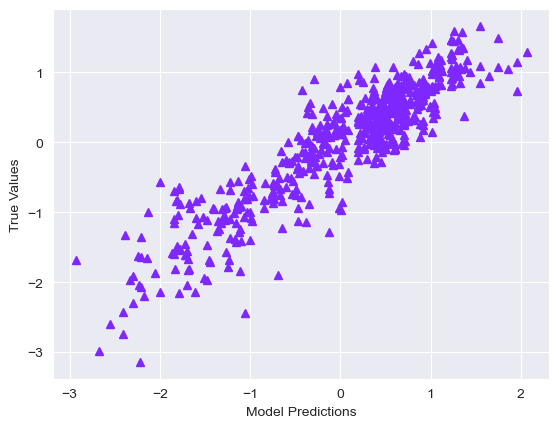

In [99]:
plt.plot(y_test, y_predict, "^", color = '#7F27FF')
plt.xlabel('Model Predictions')
plt.ylabel('True Values')

In [100]:
y_predict_orig = scaler_y.inverse_transform(y_predict)
y_test_orig = scaler_y.inverse_transform(y_test)

Plot the original values

Text(0, 0.5, 'True Values')

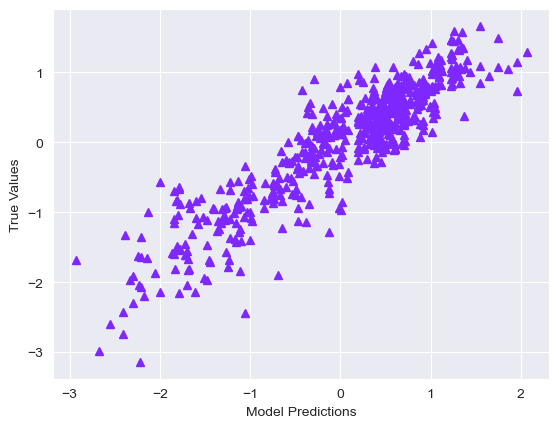

In [101]:
plt.plot(y_test_orig, y_predict_orig, "^", color = '#7F27FF')
plt.xlabel('Model Predictions')
plt.ylabel('True Values')


Plot the KPIs

In [102]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

k = X_test.shape[1]
n = len(X_test)
RMSE = float(format(np.sqrt(mean_squared_error(y_test_orig, y_predict_orig)),'.3f'))
MSE = mean_squared_error(y_test_orig, y_predict_orig)
MAE = mean_absolute_error(y_test_orig, y_predict_orig)
r2 = r2_score(y_test_orig, y_predict_orig)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2) 


RMSE = 0.397 
MSE = 0.15754536 
MAE = 0.30471712 
R2 = 0.8243981975492362 
Adjusted R2 = 0.818524193594017
